#### Universidad del Valle de Guatemala 
#### Facultad de Ingeniería
#### Departamento de Ciencias de la Computación
#### CC3094 – Security Data Science

## Laboratorio #2 – Detección de SPAM

### Integrantes

- Gabriel Vicente 20498

### 1. Objetivos
- Aplicar el uso de técnicas de pre-procesamiento para lenguaje natural
- Utilizar y evaluar método clásicos de representación numérica
- Implementar un modelo que utilice NLP para la detección de spam en SMS

### 2. Preámbulo
#### SPAM
El SPAM se refiere a mensajes no deseados o solicitados sobre publicidad de productos o servicios,
que utilizan los correos electrónicos y/o SMS para ser distribuidos. Por lo general solo son molestos,
pero algunos son peligrosos al combinarse con phishing, fraude (SCAM) o incluir malware. Ejemplos
de phishing:

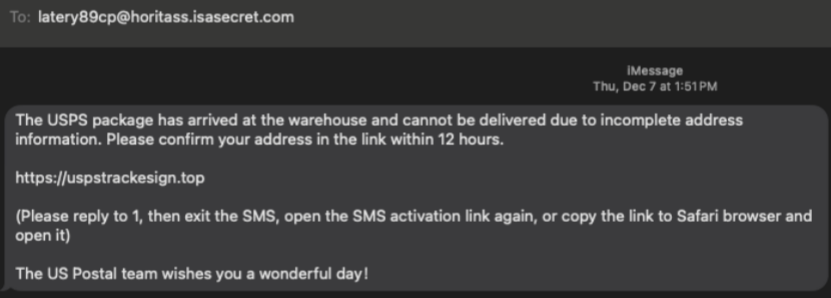

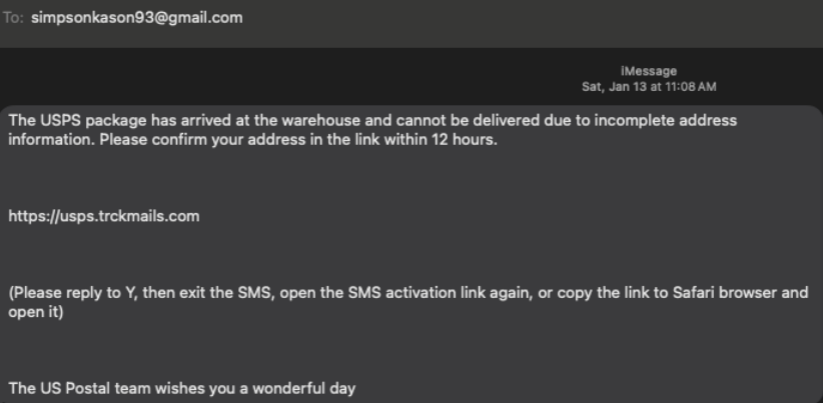

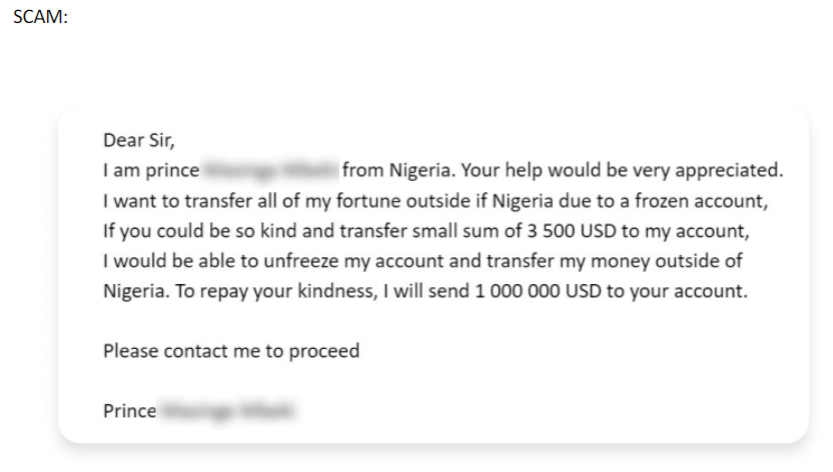

### 3. Desarrollo
El laboratorio será desarrollado en parejas. Se debe entregar un enlace a un repositorio de Github con
el código fuente del pre-procesamiento, los modelos de representación de texto y otras
características, y implementación de los modelos de clasificación, así como la explicación de las
métricas de evaluación.

### Parte 1 – Ingeniería de características
#### Exploración de datos y Pre-procesamiento
Aplique las técnicas de pre – procesamiento de lenguaje natural que considere necesarias (conversión
de minúsculas, mayúsculas, eliminación de acentos, expansión de contracciones, eliminación de stop
words, etc.)
Puede generar otras características como las expuestas en el artículo “Phishing email detection using
robust nlp techniques.”



In [1]:

# * Librerias

import re
import pandas as pd

from collections import Counter
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:

# * Lectura del archivo y convertir a minusculas 
archivo_csv = "spam.csv"

try:
    df = pd.read_csv(archivo_csv, encoding='latin-1')
except UnicodeDecodeError:
    print("Error de decodificación. Intenta con otra codificación.")

df['v2'] = df['v2'].str.lower()

display(df)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"go until jurong point, crazy.. available only ...",NaN,NaN,NaN
1,ham,ok lar... joking wif u oni...,NaN,NaN,NaN
2,spam,free entry in 2 a wkly comp to win fa cup fina...,NaN,NaN,NaN
3,ham,u dun say so early hor... u c already then say...,NaN,NaN,NaN
4,ham,"nah i don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,will ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"pity, * was in mood for that. so...any other s...",NaN,NaN,NaN
5570,ham,the guy did some bitching but i acted like i'd...,NaN,NaN,NaN


In [3]:

# * Agregar características

def difference_measure(phishing_text, ham_text):
    phishing_stems = re.findall(r'\b\w+\b', phishing_text.lower())
    ham_stems = re.findall(r'\b\w+\b', ham_text.lower())
    
    phishing_count = Counter(phishing_stems)
    ham_count = Counter(ham_stems)
    
    difference = sum((phishing_count - ham_count).values())
    return difference

def phishing_ratio(phishing_text):
    all_stems = re.findall(r'\b\w+\b', phishing_text.lower())
    phishing_count = Counter(all_stems)
    
    total_appearances = sum(phishing_count.values())
    if total_appearances == 0:
        return 0
    return phishing_count['phishing'] / total_appearances

def unique_difference_measure(phishing_text, ham_text):
    phishing_stems = set(re.findall(r'\b\w+\b', phishing_text.lower()))
    ham_stems = set(re.findall(r'\b\w+\b', ham_text.lower()))
    
    difference = len(phishing_stems - ham_stems)
    return difference

def unique_phishing_ratio(phishing_text):
    all_stems = set(re.findall(r'\b\w+\b', phishing_text.lower()))
    total_appearances = len(all_stems)
    
    if total_appearances == 0:
        return 0
    return len([stem for stem in all_stems if stem == 'phishing']) / total_appearances

def word_count(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return len(words)

stopwords_list = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both",
    "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too",
    "very", "s", "t", "can", "will", "just", "don", "should", "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren",
    "couldn", "didn", "doesn", "hadn", "hasn", "haven", "isn", "ma", "mightn", "mustn", "needn", "shan", "shouldn", "wasn",
    "weren", "won", "wouldn"
])

def stopword_count(text):
    words = re.findall(r'\b\w+\b', text.lower())
    stopword_count = len([word for word in words if word in stopwords_list])
    return stopword_count


def unique_stopword_count(text):
    words = re.findall(r'\b\w+\b', text.lower())
    unique_stopword_count = len(set([word for word in words if word in stopwords_list]))
    return unique_stopword_count

def unique_stopword_ratio(stopword_count, unique_stopword_count):
    if stopword_count == 0:
        return 0
    return unique_stopword_count / stopword_count

def unique_stopword_ratio_word_count(unique_stopword_count, word_count):
    if word_count == 0:
        return 0
    return unique_stopword_count / word_count

def punctuation_count(text):
    punctuation_count = len(re.findall(r'[^\w\s]', text))
    return punctuation_count

def punctuation_ratio_word_count(punctuation_count, word_count):
    if word_count == 0:
        return 0
    return punctuation_count / word_count

df['Difference Measure'] = df.apply(lambda row: difference_measure(row['v2'], row['v2']), axis=1)
df['Phishing Ratio'] = df['v2'].apply(phishing_ratio)
df['Unique Difference Measure'] = df.apply(lambda row: unique_difference_measure(row['v2'], row['v2']), axis=1)
df['Unique Phishing Ratio'] = df['v2'].apply(unique_phishing_ratio)
df['Word Count'] = df['v2'].apply(word_count)
df['Stopword Count'] = df['v2'].apply(stopword_count)
df['Unique Stopword Count'] = df['v2'].apply(unique_stopword_count)
df['Unique Stopword Ratio'] = df.apply(lambda row: unique_stopword_ratio(row['Stopword Count'], row['Unique Stopword Count']), axis=1)
df['Unique Stopword Ratio / Word Count'] = df.apply(lambda row: unique_stopword_ratio_word_count(row['Unique Stopword Count'], row['Word Count']), axis=1)
df['Punctuation Count'] = df['v2'].apply(punctuation_count)
df['Punctuation Ratio / Word Count'] = df.apply(lambda row: punctuation_ratio_word_count(row['Punctuation Count'], row['Word Count']), axis=1)

df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

display(df)


,v1,v2,Difference Measure,Phishing Ratio,Unique Difference Measure,Unique Phishing Ratio,Word Count,Stopword Count,Unique Stopword Count,Unique Stopword Ratio,Unique Stopword Ratio / Word Count,Punctuation Count,Punctuation Ratio / Word Count
0,ham,"go until jurong point, crazy.. available only ...",0,0.0,0,0.0,20,4,4,1.000000,0.200000,9,0.450000
1,ham,ok lar... joking wif u oni...,0,0.0,0,0.0,6,0,0,0.000000,0.000000,6,1.000000
2,spam,free entry in 2 a wkly comp to win fa cup fina...,0,0.0,0,0.0,33,8,5,0.625000,0.151515,6,0.181818
3,ham,u dun say so early hor... u c already then say...,0,0.0,0,0.0,11,2,2,1.000000,0.181818,6,0.545455
4,ham,"nah i don't think he goes to usf, he lives aro...",0,0.0,0,0.0,14,7,6,0.857143,0.428571,2,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,0,0.0,0,0.0,33,10,7,0.700000,0.212121,9,0.272727
5568,ham,will ì_ b going to esplanade fr home?,0,0.0,0,0.0,8,2,2,1.000000,0.250000,1,0.125000
5569,ham,"pity, * was in mood for that. so...any other s...",0,0.0,0,0.0,10,7,7,1.000000,0.700000,7,0.700000
5570,ham,the guy did some bitching but i acted like i'd...,0,0.0,0,0.0,27,14,13,0.928571,0.481481,1,0.037037


#### Representación de texto
Utilice los modelos de BoG (para n = 1,2) y TF-IDF. Muestre algunos ejemplos de los mensajes en su
representación numérica.

In [4]:

ejemplos_mensajes = df['v2'].head(5) 

vectorizer_bog_n1 = CountVectorizer(ngram_range=(1, 1))
vectorizer_bog_n2 = CountVectorizer(ngram_range=(1, 2))

vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 1))

bog_n1_representation = vectorizer_bog_n1.fit_transform(ejemplos_mensajes)
bog_n2_representation = vectorizer_bog_n2.fit_transform(ejemplos_mensajes)
tfidf_representation = vectorizer_tfidf.fit_transform(ejemplos_mensajes)

for i, mensaje in enumerate(ejemplos_mensajes):
    print(f"\nMensaje {i + 1}:\n{mensaje}")
    print(f"BoG (n=1) Representation:\n{bog_n1_representation[i]}")
    print(f"BoG (n=2) Representation:\n{bog_n2_representation[i]}")
    print(f"TF-IDF Representation:\n{tfidf_representation[i]}\n")



Mensaje 1:
go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...
BoG (n=1) Representation:
  (0, 22)	1
  (0, 55)	1
  (0, 31)	1
  (0, 40)	1
  (0, 13)	1
  (0, 8)	1
  (0, 39)	1
  (0, 29)	1
  (0, 10)	1
  (0, 25)	1
  (0, 61)	1
  (0, 32)	1
  (0, 9)	1
  (0, 11)	1
  (0, 49)	1
  (0, 24)	1
  (0, 5)	1
  (0, 57)	1
BoG (n=2) Representation:
  (0, 45)	1
  (0, 114)	1
  (0, 65)	1
  (0, 82)	1
  (0, 25)	1
  (0, 15)	1
  (0, 80)	1
  (0, 60)	1
  (0, 19)	1
  (0, 51)	1
  (0, 125)	1
  (0, 67)	1
  (0, 17)	1
  (0, 21)	1
  (0, 100)	1
  (0, 49)	1
  (0, 9)	1
  (0, 118)	1
  (0, 46)	1
  (0, 115)	1
  (0, 66)	1
  (0, 83)	1
  (0, 26)	1
  (0, 16)	1
  (0, 81)	1
  (0, 61)	1
  (0, 20)	1
  (0, 52)	1
  (0, 126)	1
  (0, 68)	1
  (0, 18)	1
  (0, 22)	1
  (0, 101)	1
  (0, 50)	1
  (0, 10)	1
TF-IDF Representation:
  (0, 57)	0.23802160257910548
  (0, 5)	0.23802160257910548
  (0, 24)	0.23802160257910548
  (0, 49)	0.23802160257910548
  (0, 11)	0.23802160257910548
  (0, 9)	0.23

### Parte 2 – Implementación del modelo
#### Separación de datos
• Datos de entrenamiento: 70%
• Datos de prueba: 30%



In [5]:


df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(df_train)}")
print(f"Tamaño del conjunto de prueba: {len(df_test)}")

Tamaño del conjunto de entrenamiento: 3900
Tamaño del conjunto de prueba: 1672


#### Implementación
Utilice un algoritmo de ML para entrenar el modelo con cada uno de los modelos de representación
numérica. Muestre los valores obtenidos para las siguientes métricas:
- Matriz de confusión
- Precision
- Recall
- Curva ROC
- AUC

In [ ]:

# * Implementacion


# * Metricas solicitadas



### Discusión
1. ¿Qué error es más “aceptable”: dejar pasar un SMS de SPAM (falso negativo) o bloquear un
SMS legítimo (falso positivo)? Justifique su respuesta.

R//

2. Compare los valores para cada modelo de representación numérico. En base a la respuesta de
la primera pregunta ¿Qué modelo de representación numérica produjo el mejor resultado,
BoG o TF-IDF? ¿Cuál o cuáles son las razones por las que dicho modelo se comportó de mejor
manera?

R//

3. En base a la exploración de datos e ingeniería de características que realizó en el primer y este
laboratorio, ¿qué consejos le daría a un familiar que le solicita ayuda para detectar si un email
o SMS es phishing o no? ¿En qué características de una URL/email podría fijarse su familiar
para ayudarlo a detectar un potencial phishing?

R//

4. Si detectamos una URL o email/SMS de phishing, ¿qué podemos hacer para detener su
distribución?

R//

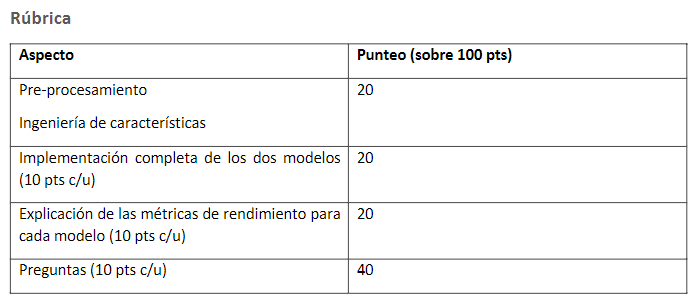